**Forecasting (Coco Cola Sales)**

In [1123]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas import DataFrame
from pandas import Grouper
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

**EDA**

In [1124]:
Coca=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
Coca.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [1125]:
Coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [1126]:
Coca.shape

(42, 2)

In [1127]:
Coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [1128]:
Coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


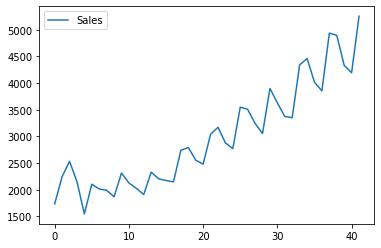

In [1129]:
Coca.plot();
pyplot.show()

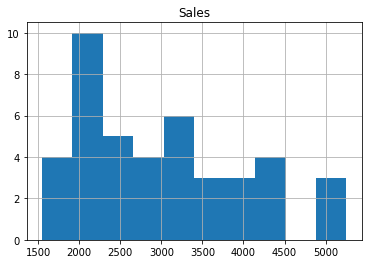

In [1130]:
data =pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0,parse_dates=True)
data.hist()
pyplot.show()

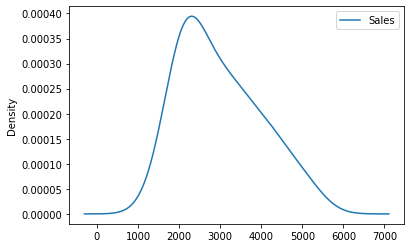

In [1131]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0,parse_dates=True)
data.plot(kind='kde')
pyplot.show()

Box and Whisker Plots by Interval

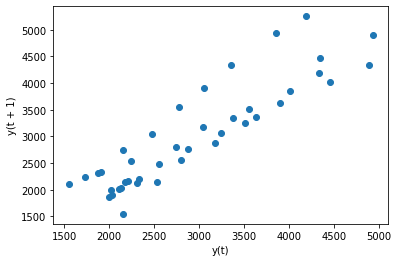

In [1132]:
from pandas.plotting import lag_plot
data =pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0,parse_dates=True)
lag_plot(data)
pyplot.show()

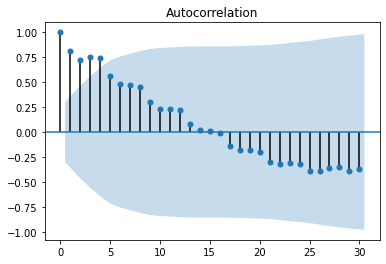

In [1133]:
from statsmodels.graphics.tsaplots import plot_acf
data =pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0,parse_dates=True)
plot_acf(data,lags=30)
pyplot.show()

In [1134]:
# Splitting data to train and test (validation)

In [1135]:
Train = Coca.head(38)
Test = Coca.tail(4)

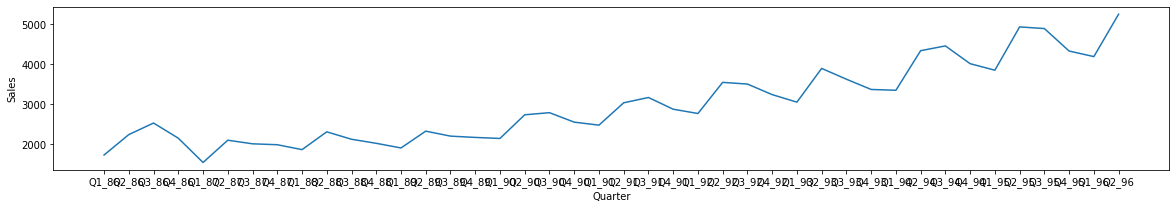

In [1136]:
#Line plot
plt.figure(figsize=(20,3))
sns.lineplot(x="Quarter",y="Sales",data=Coca);

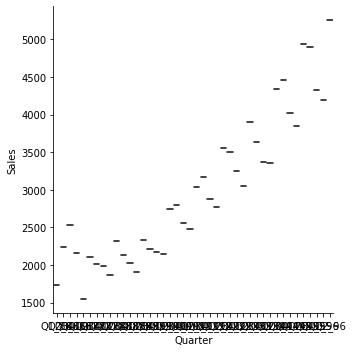

In [1137]:
sns.factorplot("Quarter","Sales",data=Coca,kind="box");

In [1138]:
quarter=['Q1','Q2','Q3','Q4']
n=Coca['Quarter'][0]
n[0:2]

Coca['quarter']=0

In [1139]:
for i in range(42):
    n=Coca['Quarter'][i]
    Coca['quarter'][i]=n[0:2]

In [1140]:
dummy=pd.DataFrame(pd.get_dummies(Coca['quarter']))
dummy.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [1141]:
# adding t and t_square columns to dataset
df=pd.concat((Coca,dummy),axis=1)
t= np.arange(1,43)
df['t']=t
df['t_square']=df['t']*df['t']

In [1142]:
df

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [1143]:
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25


In [1144]:
# Adding log_sales to dataset
log_Sales=np.log(df['Sales'])
df['log_Sales']=log_Sales
df.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [1145]:
# Splitting data to train and test (validation)

In [1146]:
Train= df.head(37)
Test=df.tail(5)

**Model Based Approch (Buliding Models)**

In [1147]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

737.1568992951951

In [1148]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

586.8646090003102

In [1149]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

445.8029895177927

In [1150]:
#Additive seasonality 

add_sea = smf.ols('Sales~ Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1931.36279040632

In [1151]:
#Additive Seasonality with Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

252.2557608176047

In [1152]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

rmse_add_linear=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(predaddlinear))**2))
rmse_add_linear

572.3530370243457

In [1153]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2023.7328645103598

In [1154]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmse_mu_lin=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(predmullin)))**2))
rmse_mu_lin

290.26847888864995

In [1155]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

594.3833855598255

In [1156]:
 #Compare the results 
Models = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad",'rmse_add_linear',"rmse_Mult_sea",'rmse_mu_lin',"rmse_mul_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_add_linear,rmse_Mult_sea,rmse_mu_lin,rmse_mul_quad])}
table_rmse=pd.DataFrame(Models)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,252.255761
7,rmse_mu_lin,290.268479
2,rmse_Quad,445.802990
5,rmse_add_linear,572.353037
1,rmse_Exp,586.864609
8,rmse_mul_quad,594.383386
0,rmse_linear,737.156899
3,rmse_add_sea,1931.362790
6,rmse_Mult_sea,2023.732865


**Data Driven Models**

### Simple Exponential Method


In [1157]:
#Moving Average

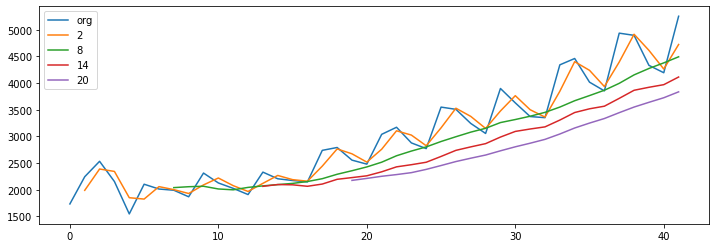

In [1158]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,24,6):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# ACF plots and PACF plots


In [1159]:
# ACF plots and PACF plots

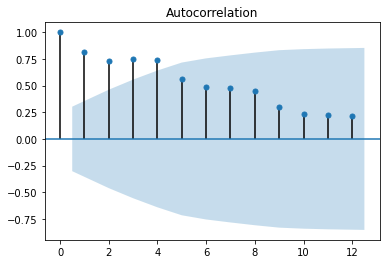

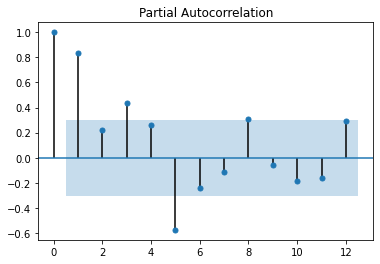

In [1160]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

### Evaluation Metric MAPE

In [1161]:
# MAPE 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [1162]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

19.12727544457338

In [1163]:
# Holt method 
hw_model = Holt(Train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

14.286062827267376

In [1164]:
#Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

4.2521831635724165

In [1165]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

3.639952023932765

In [1166]:
hwe_model_mul_add_final = ExponentialSmoothing(coco["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [1167]:
#Forecasting for next 10 time periods
hwe_model_mul_add_final.forecast(15)

42    4923.825834
43    4585.806901
44    4530.662095
45    5759.370929
46    5819.152426
47    5203.721006
48    4956.155622
49    6256.502400
50    6107.476878
51    5463.902671
52    5266.754892
53    6577.688511
54    6134.418921
55    5690.656273
56    5600.741202
dtype: float64

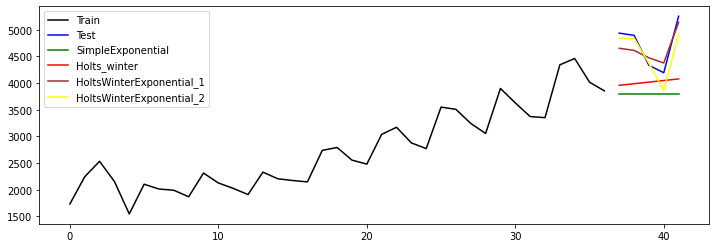

In [1168]:
# Visualization of Forecasted values for Test data set using different methods 
plt.figure(figsize=(12,4))
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best');

In [1169]:
df = {"MODEL":pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_add"]),"MAPE_Values":pd.Series([MAPE(pred_ses,Test.Sales),MAPE(pred_hw,Test.Sales),MAPE(pred_hwe_add_add,Test.Sales),MAPE(pred_hwe_mul_add,Test.Sales)])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
3,hwe_model_mul_add,3.639952
2,hwe_model_add_add,4.252183
1,hw_model,14.286063
0,ses_model,19.127275


TRANSFORMATION

In [1170]:
series = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)

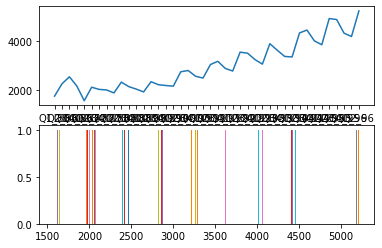

In [1171]:
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

Square Root Transform

In [1172]:
from numpy import sqrt

In [1173]:
dataframe = DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])

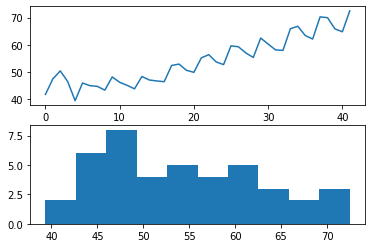

In [1174]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

Log Transform

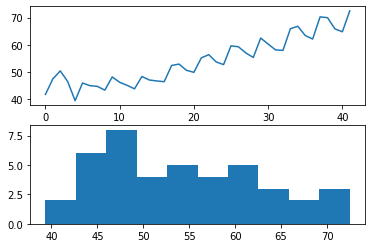

In [1175]:
from numpy import log
dataframe = DataFrame(series.values)
dataframe.columns = ['Sales']
dataframe['passengers'] = log(dataframe['Sales'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

  Quarter        Sales quarter
0   Q1_86  1734.827000      Q1
1   Q2_86  2244.960999      Q2
2   Q3_86  2533.804993      Q3
3   Q4_86  2154.962997      Q4
4   Q1_87  1547.818996      Q1


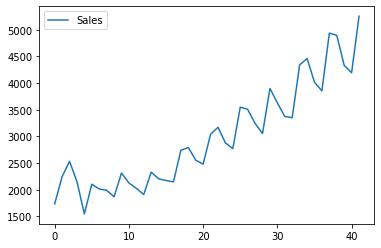

In [1176]:
print(Coca.head())
Coca.plot()
pyplot.show()

**ARIMA Hyperparameters**

In [1177]:
# ARIMA model

In [1178]:
# grid search ARIMA parameters for a time series

import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [1179]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [1180]:
# load dataset
train =pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [1181]:
from statsmodels.tsa.arima_model import ARIMA

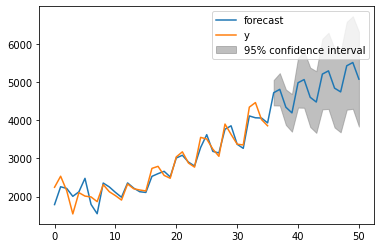

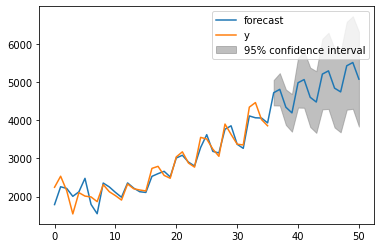

In [1182]:
X = Train.Sales.values
X = X.astype('float32')
model = ARIMA(X, order=(4,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 51)

#### Combine train and test data and build final model

In [1183]:
# Error with test data
from sklearn.metrics import mean_squared_error
from math import sqrt
y=Test.Sales.values
y=y.astype('float32')
rmse = sqrt(mean_squared_error(y, forecast[0:5]))
rmse

160.66302135821942

In [1184]:
forecast

array([4719.32796755, 4807.25367626, 4340.27689638, 4191.52093352,
       4980.31383204, 5063.21109303, 4599.17314297, 4475.55074522,
       5206.76245535, 5290.77987519])

#### Build Model based on the optimized values

In [1185]:
# save finalized model to file
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [1186]:
# load data
train = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

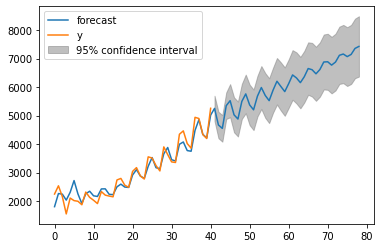

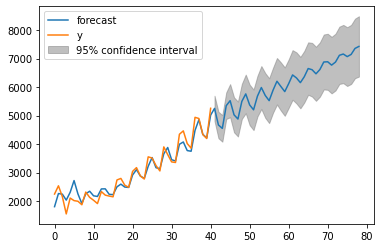

In [1187]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [1188]:
ts = Coca['Sales']
ts.tail()

37    4936.0
38    4895.0
39    4333.0
40    4194.0
41    5253.0
Name: Sales, dtype: float64

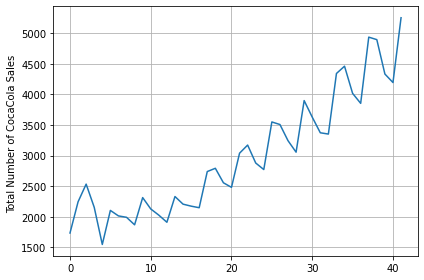

In [1189]:
import matplotlib.pylab as plt
plt.plot(ts)
plt.ylabel('Total Number of CocaCola Sales ')
plt.grid()
plt.tight_layout()
plt.savefig('CocaCola_Sales.png')
plt.show()

In [1190]:
from statsmodels.tsa.stattools import adfuller

def CocaCola_Sales(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non Sales
        print("X is Sales")
        return True
    else:
        print("X is not Sales")
        return False

In [1191]:
ts_diff = pd.Series(ts)
d = 0
while CocaCola_Sales(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1

X is not Sales
X is not Sales
X is Sales


**Fit the SARIMA Model**

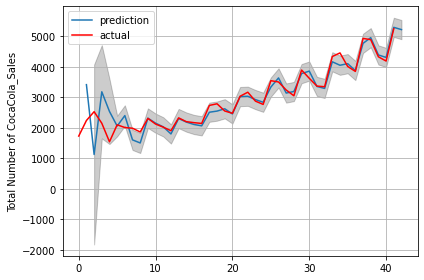

In [1192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 9
q = 1
model = SARIMAX(ts, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')
    
fcast = model_fit.get_prediction(start=1, end=len(ts))
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()


plt.show()
plt.plot(ts_p,label='prediction')
plt.plot(ts,color='red',label='actual')
plt.fill_between(ts_ci.index[1:],
                ts_ci.iloc[1:, 0],
                ts_ci.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel('Total Number of CocaCola_Sales')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('Coca_Sales.png')
plt.show()

In [1193]:
from scipy import stats
stats.pearsonr(ts_p[1:], ts[1:]) 

(0.9066358213154487, 3.370247744487896e-16)

In [1194]:
residuals = ts - ts_p
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ts-np.mean(ts))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.8365517301987948

In [1195]:
#summary of the model
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                   42
Model:               SARIMAX(9, 2, 1)   Log Likelihood                -266.853
Date:                Fri, 18 Mar 2022   AIC                            555.705
Time:                        20:25:57   BIC                            574.283
Sample:                             0   HQIC                           562.423
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1476      0.761     -0.194      0.846      -1.639       1.344
ar.L2         -0.3617      0.866     -0.418      0.676      -2.058       1.335
ar.L3         -0.1685      1.071     -0.157      0.8

In [1196]:
#get the predictions and residuals
predictions = model_fit.forecast(len(Coca))
predictions = pd.Series(predictions, index=Coca.index)
residuals = Coca - predictions

Text(0, 0.5, 'Error')

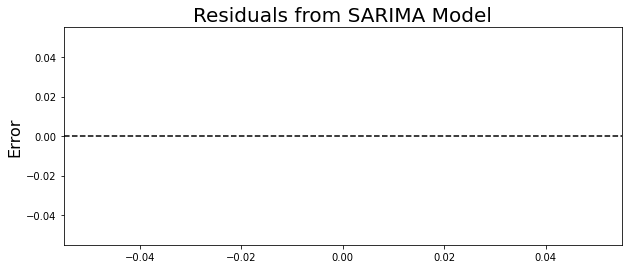

In [1197]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [1198]:
Coca

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [1199]:
#read data
coco_sales =pd.read_excel('CocaCola_Sales_Rawdata.xlsx', parse_dates=[0], index_col=0, squeeze=True)

In [1200]:
# load and plot a time series
from matplotlib import pyplot

**Predict for new time period**

In [1201]:
predict_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [1202]:
predict_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [1203]:
#Build the model on entire data set
model_full =smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()